# Playing with Classifiers

## Integration test with Genetic Search
This section of notebook tests checks that classifiers can be used with Genetic Search. It is essentially the pipe example for segmentors, but using classifiers.

In [1]:
from see.classifiers import Classifier
from see.classifier_fitness import ClassifierFitness
from see.Workflow import workflow


# Initialize Algorithm Space and Workflow
algorithm_space = Classifier.algorithmspace

workflow.addalgos([Classifier, ClassifierFitness])
wf = workflow()
print(wf)

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5



# Creating Trials
First, **preprocessing** of the provided dataset needs to occur prior to using the classifier pipeline.
We then split the dataset into a training and testing set. The **testing set** will be **stored**
away until the very end where it will be used to compare the best solutions found via Genetic Search.
Solutions will be compared in the form of **side-by-side plots**.
The **training set** will be **further split** into smaller trials that will be used to tune each generation
of algorithms during the Genetic Search algorithm.

In [2]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from see.base_classes import pipedata
from see.classifier_helpers import helpers

# Import/Create data
X, y = make_moons(noise=0.3, random_state=15)
#X, y = make_circles(noise=0.2, factor=0.5, random_state=21)

# Preprocess data
X = StandardScaler().fit_transform(X)

# Split data into training and testing sets
dataset = helpers.generate_train_test_set(X, y)

# Split training data into trials
trials = helpers.generate_tuning_trials(dataset.training_set.X, dataset.training_set.y)

In [3]:
# Example run of the default Classifier on the generated trials
individual = Classifier()
data = individual.runAlgo(trials)
print(data)
print("The fitness score of the default classifier: ", ClassifierFitness().pipe(data).fitness)

<class 'see.classifiers.Classifier'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5

Time: 1.022 s
The fitness score of the default classifier:  0.13333333333333336


## Genetic Search with Classifiers

In [4]:
from see import GeneticSearch

In [5]:
mydata = trials
num_generations = 10
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=15, hof_size=num_generations)

In [6]:
# warnings may appear when this runs
population = my_evolver.run(ngen=num_generations)

Initializing a new random population
Generation 0/10 of population size 15
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 75
	alpha = 0.6487
	max_depth = 694
	n_estimators = 220
	n_neighbors = 526

Time: 0.009 s
fitness=0.18333333333333332

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 441
	alpha = 0.3278
	max_depth = 682
	n_estimators = 328
	n_neighbors = 933

Time: 0.004 s
fitness=0.16666666666666669

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 974
	alpha = 0.37
	max_depth = 486
	n_estimators = 237
	n_neighbors = 272

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.014 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 422
	alpha = 0.8975
	max_depth = 277
	n_estimators = 83
	n_neighbors = 966

Time: 0.709 s
fitness=0.14999999999999997

<c

Time: 0.912 s
fitness=0.13333333333333336

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 655
	alpha = 0.6287
	max_depth = 811
	n_estimators = 639
	n_neighbors = 910

Time: 0.87 s
fitness=0.15

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 256
	alpha = 0.5831
	max_depth = 637
	n_estimators = 812
	n_neighbors = 576

Time: 0.932 s
fitness=0.13333333333333336

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 900
	alpha = 0.304
	max_depth = 885
	n_estimators = 596
	n_neighbors = 257

Time: 4.776 s
fitness=0.14999999999999997

#BEST [0.11666666666666667,  ['Random Forest', 8, 0.866, 568, 805, 873]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algor

Time: 4.0 s
fitness=0.13333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 609
	alpha = 0.7264
	max_depth = 645
	n_estimators = 560
	n_neighbors = 186

Time: 4.513 s
fitness=0.13333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 8
	alpha = 0.866
	max_depth = 156
	n_estimators = 805
	n_neighbors = 873

Time: 6.42 s
fitness=0.09999999999999999

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 8
	alpha = 0.7264
	max_depth = 645
	n_estimators = 560
	n_neighbors = 186

Time: 4.632 s
fitness=0.13333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 609
	alpha = 0.866
	max_depth = 156
	n_estimators = 805
	n_neighbors = 873

Time: 6.395 s
fitness=0.09999999999999999

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 481
	alpha = 0.5629
	max_depth = 568
	n_estimators = 386
	n_

Time: 4.251 s
fitness=0.11666666666666667

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 39
	alpha = 0.4794
	max_depth = 925
	n_estimators = 541
	n_neighbors = 231

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.011 s
fitness=0.26666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 126
	alpha = 0.9984
	max_depth = 566
	n_estimators = 643
	n_neighbors = 650

Time: 0.003 s
fitness=0.15

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 932
	alpha = 0.8035
	max_depth = 449
	n_estimators = 751
	n_neighbors = 840

Time: 0.932 s
fitness=0.13333333333333336

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 609
	alpha = 0.866
	max_depth = 156
	n_estimators = 560
	n_neighbors = 873

Time: 4.591 s
fitness=0.11666666666666667

<class 'see.Workflow.workflow'> parameters

Time: 0.864 s
fitness=0.15

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 118
	alpha = 0.8314
	max_depth = 179
	n_estimators = 172
	n_neighbors = 978

Time: 0.004 s
fitness=0.16666666666666669

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 830
	alpha = 0.2408
	max_depth = 880
	n_estimators = 872
	n_neighbors = 985

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.009 s
fitness=0.15

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 203
	alpha = 0.5965
	max_depth = 282
	n_estimators = 35
	n_neighbors = 218

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.01 s
fitness=0.15

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 743
	alpha = 0.0431
	max_depth = 973
	n_estimators = 78
	n_neighbors = 579

Time: 0.64

Time: 2.431 s
fitness=0.13333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 446
	alpha = 0.8257
	max_depth = 642
	n_estimators = 401
	n_neighbors = 738

Time: 0.004 s
fitness=0.15

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 978
	alpha = 0.9378
	max_depth = 736
	n_estimators = 813
	n_neighbors = 663

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.01 s
fitness=0.26666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 667
	alpha = 0.4002
	max_depth = 8
	n_estimators = 480
	n_neighbors = 879

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
Time: 0.01 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 186
	alpha = 0.2649
	max_depth = 844
	n_estimators =

Time: 0.723 s
fitness=0.14999999999999997

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 609
	alpha = 0.866
	max_depth = 156
	n_estimators = 560
	n_neighbors = 873

Time: 4.424 s
fitness=0.11666666666666667

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 609
	alpha = 0.866
	max_depth = 156
	n_estimators = 805
	n_neighbors = 873

Time: 6.28 s
fitness=0.11666666666666667

#BEST [0.09999999999999999,  ['Random Forest', 956, 0.8309, 645, 660, 451]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over w

In [7]:
print(my_evolver.hof[0].fitness.values[0]) # The best solution in each generation
print(my_evolver.best_avgs) # The fitness score of the best of each generation

%store my_evolver

0.09999999999999999
[0.1511111111111111, 0.14666666666666664, 0.14555555555555555, 0.1322222222222222, 0.1411111111111111, 0.14777777777777776, 0.13444444444444445, 0.1377777777777778, 0.1511111111111111, 0.14666666666666664, 0.1411111111111111]


PicklingError: Can't pickle <function map at 0x7f6a42357e50>: it's not the same object as scoop.futures.map

## Final Comparison
We compare the found solutions using the testing set that was set aside at the very beginning.
We also train the classifiers using the training set that was made at the very beginning.

*TODO*: I'm not sure if it is correct to retrain the classifiers using the entire training
set. There might be issues with overfitting...

*TODO*: The plots below work nicely because we have two dimension data. Think about what to
do when the feature space is multidimensional.

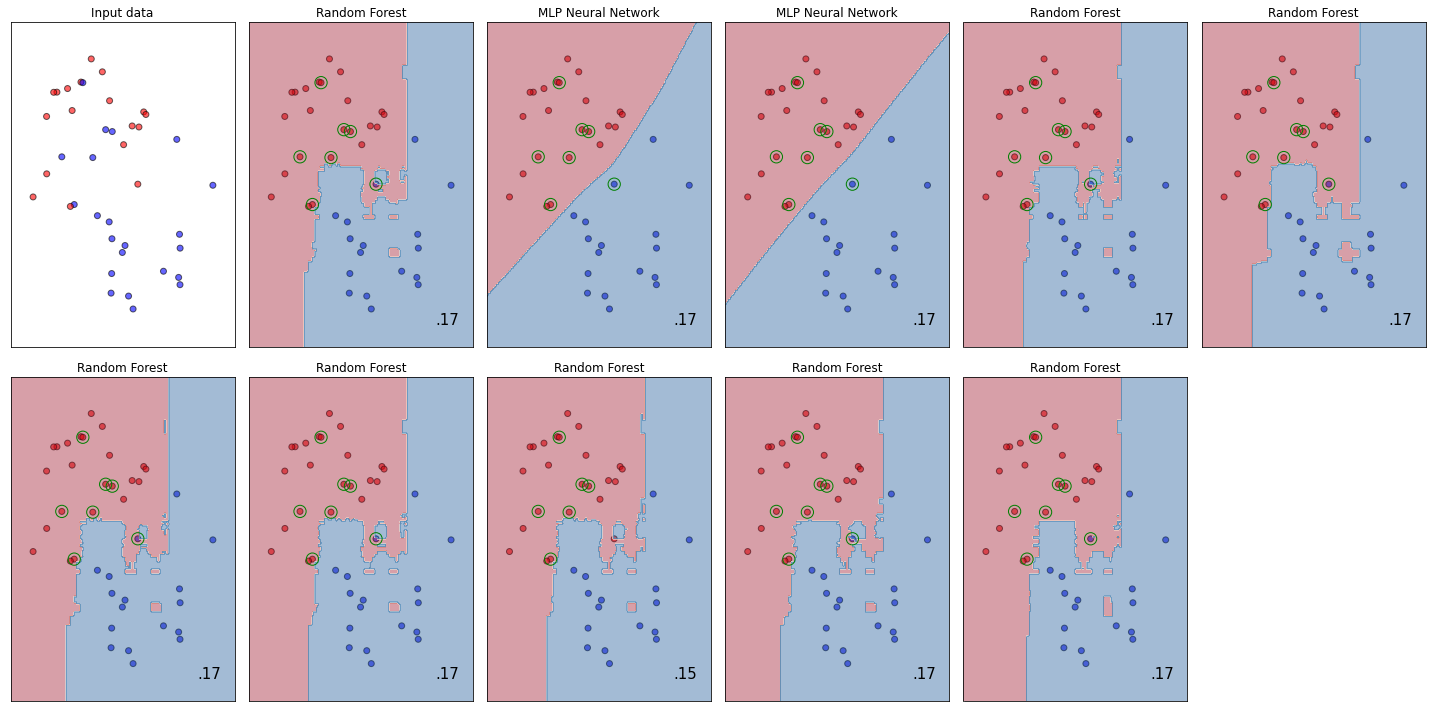

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

solution_set = my_evolver.hof

# Use stored away testing set and the entire training set for final comparisons
training_set = dataset.training_set
testing_set = dataset.testing_set

# TODO: Algorithms may be non-deterministic so fitness scores may change
# on different plot iterations...?

# Color Maps
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Create Mesh Grid
h = 0.02
x_min, x_max = testing_set.X[:, 0].min() - .5, testing_set.X[:, 0].max() + .5
y_min, y_max = testing_set.X[:, 1].min() - .5, testing_set.X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                  np.arange(y_min, y_max, h))

figure = plt.figure(figsize=(20, 10))

ax = plt.subplot(2,round(len(solution_set)/2) + 1,1)

# Plot the training points and testing points (Input data)
#ax.scatter(training_set.X[:, 0], training_set.X[:, 1], c=training_set.y, cmap=cm_bright,
#           edgecolors='k')
ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=testing_set.y, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

# Format plot
ax.set_title("Input data")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

for i, ind in enumerate(solution_set):
    # Initialize classifier
    algo_name = ind[0]
    param_list = ind
    clf = Classifier.algorithmspace[algo_name](param_list)
    
    predictions = clf.evaluate(training_set, testing_set)

    ax = plt.subplot(2, round(len(solution_set)/2) + 1,i + 2)

    # Plot predictions and fitness score
    ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=predictions, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    score = ClassifierFitness().evaluate(predictions, testing_set.y)
    
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')

    # Draw Contour/Color Plot
    # TODO: We have to retrain the data set because we
    # we do not store the classifier created in clf#evaluate
    # anywhere. Consider storing it as an attribute.

    contour_set = pipedata()
    contour_set.X = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.evaluate(training_set, contour_set)
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
    
    # Highlight/circle errors
    errors = testing_set.X[predictions != testing_set.y]
    for mistake in errors:
        #err = testing_set.X[mistake,:]
        ax.scatter(mistake[0], mistake[1], marker='o', s=150, lw=1, color="green", facecolor="none")

    # Format plot
    ax.set_title(algo_name)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

plt.tight_layout()

In [9]:
my_evolver.hof[0]
print(my_evolver.hof)

[['Random Forest', 956, 0.8309, 645, 660, 451], ['MLP Neural Network', 956, 0.8309, 645, 660, 451], ['MLP Neural Network', 956, 0.8309, 408, 660, 451], ['Random Forest', 609, 0.866, 645, 560, 873], ['Random Forest', 743, 0.0431, 973, 78, 579], ['Random Forest', 609, 0.866, 156, 560, 873], ['Random Forest', 609, 0.866, 156, 805, 873], ['Random Forest', 609, 0.7264, 645, 560, 186], ['Random Forest', 8, 0.866, 156, 805, 873], ['Random Forest', 609, 0.866, 973, 78, 873]]


In [10]:
list(map(lambda ind: ind.fitness.values[0], my_evolver.hof))

[0.09999999999999999,
 0.11666666666666665,
 0.13333333333333336,
 0.14999999999999997,
 0.15,
 0.11666666666666667,
 0.15,
 0.11666666666666667,
 0.09999999999999999,
 0.11666666666666667]

# Comparing Genetic Search and final test

([<matplotlib.axis.XTick at 0x7f6a40d39250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

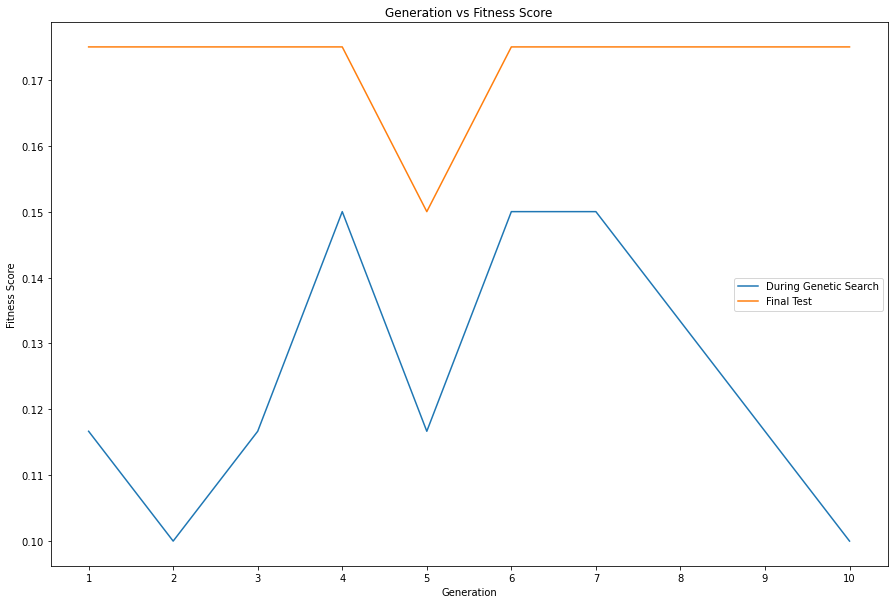

In [11]:
import matplotlib.pyplot as plt

# The following plot shows:
# 1) The fitness scores of the best individual of each generation during Genetic Search
# 2) The fitness scores of the best individual of each generation when tested on the unseen testing set

solution_set = my_evolver.hof

x = range(1, num_generations + 1)
#x = range(num_generations, 0, -1)

# Extract fitness scores during Genetic Search
y_1 = list(map(lambda ind: ind.fitness.values[0], solution_set))
y_1.reverse()

def score_clf(algo_vector, testing_set):
    algo_name = algo_vector[0]
    param_list = algo_vector
    targets = testing_set.y
    clf = Classifier.algorithmspace[algo_name](param_list)
    predictions = clf.evaluate(training_set, testing_set)
    return ClassifierFitness().evaluate(predictions, targets)
    
y_2 = list(map(lambda ind: score_clf(ind, testing_set), solution_set))
y_2.reverse()

figure = plt.figure(figsize=(15, 10))
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.legend(['During Genetic Search', 'Final Test'])
plt.title('Generation vs Fitness Score')
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.xticks(x)

In [12]:
%store -r my_dataset

no stored variable or alias my_dataset


In [13]:
%store

Stored variables and their in-db values:
my_evolver             -> '<unavailable>'
